In [1]:
# We will be predicting the price of the stock based on the data from 1983

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
stock_data = pd.read_csv('./SPY_historical_data.csv')
print("First 5 values")
stock_data.head()

First 5 values


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
0,43.96875,43.96875,43.75000,43.93750,24.608627,1003200,1993,1,29
1,43.96875,44.25000,43.96875,44.25000,24.783655,480500,1993,2,1
2,44.21875,44.37500,44.12500,44.34375,24.836147,201300,1993,2,2
3,44.40625,44.84375,44.37500,44.81250,25.098700,529400,1993,2,3
4,44.96875,45.09375,44.46875,45.00000,25.203709,531500,1993,2,4


In [4]:
print("Last 5 values")
stock_data.tail()

Last 5 values


,Open,High,Low,Close,Adj Close,Volume,Year,Month,Day
7965,563.739990,568.690002,560.830017,561.400024,559.683350,59044900,2024,9,18
7966,571.010010,572.880005,568.080017,570.979980,569.234009,75315500,2024,9,19
7967,567.840027,569.309998,565.169983,568.250000,568.250000,77503100,2024,9,20
7968,569.340027,570.330017,568.099976,569.669983,569.669983,44116900,2024,9,23
7969,570.479980,571.359985,567.599976,571.299988,571.299988,46752900,2024,9,24


In [5]:
print(stock_data.columns)
# print(stock_data.info)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Year', 'Month',
       'Day'],
      dtype='object')


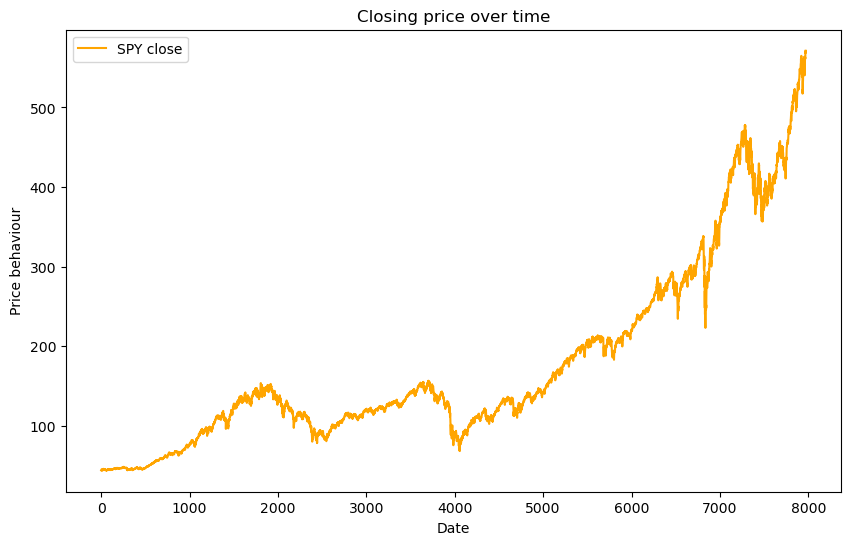

In [6]:
# plotting closing price over time
plt.figure(figsize=(10, 6))
# plt.plot(stock_data['Open'], label='SPY open', color='Blue')
plt.plot(stock_data['Close'], label='SPY close', color='Orange')
plt.title("Closing price over time")
plt.xlabel('Date')
plt.ylabel('Price behaviour')
plt.legend()
plt.show()

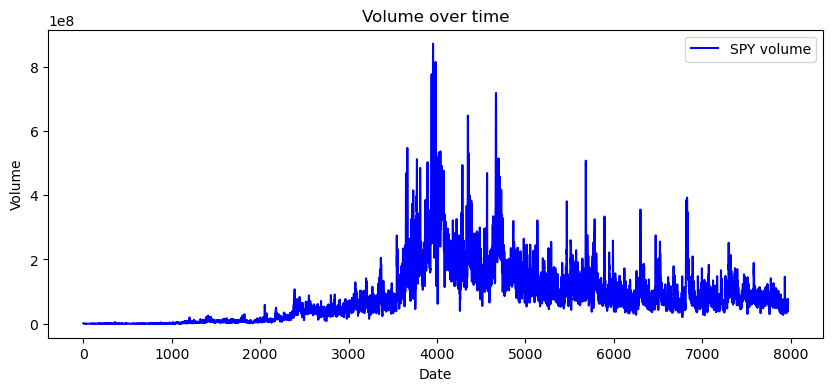

In [7]:
# plotting volume over time
plt.figure(figsize=(10, 4))
plt.plot(stock_data['Volume'], label='SPY volume', color='Blue')
plt.title('Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

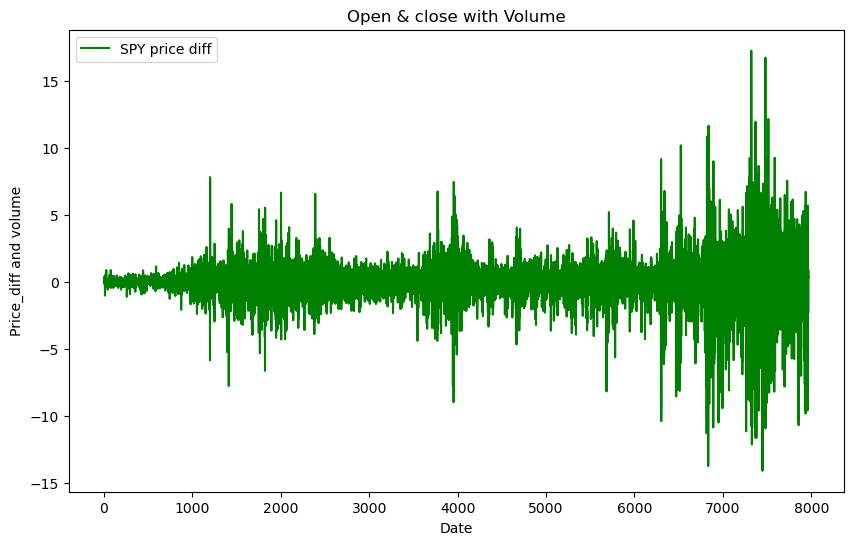

In [8]:
# Graph for open_close_diff and volume over time
stock_data['open_close_diff'] = stock_data['Close'] - stock_data['Open']
plt.figure(figsize=(10, 6))
plt.plot(stock_data['open_close_diff'], label='SPY price diff', color='Green')
# plt.plot(stock_data['Volume'], label='SPY volume', color='Blue')
plt.title('Open & close with Volume')
plt.xlabel('Date')
plt.ylabel('Price_diff and volume')
plt.legend()
plt.show()

In [9]:
# Since we have read the data, we will be going over several tasks we can perform using the SPY data

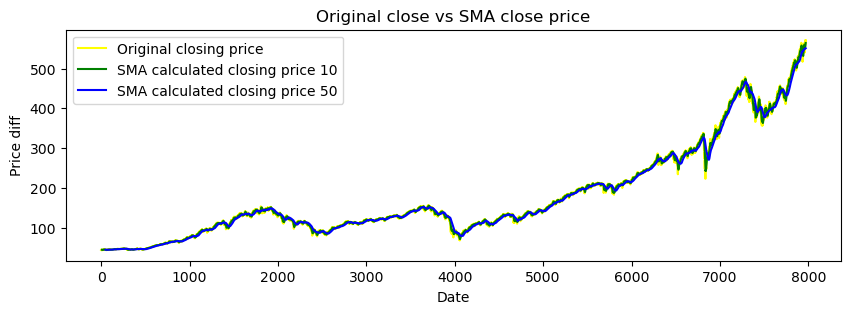

In [10]:
# Task 1: Technical analysis
# 1.1 Simple moving average(SMA)
# SMA basically mean dividing the given values or period in a small window and taking mean of values in that window and then plotting a graph for that
# SMA = (P1 + P2 + P3 _ _ _ _ _ + P4) / n

stock_data['SMA_10'] = stock_data['Close'].rolling(window=10).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 3))
plt.plot(stock_data['Close'], label='Original closing price', color='Yellow')
plt.plot(stock_data['SMA_10'], label='SMA calculated closing price 10', color='Green')
plt.plot(stock_data['SMA_50'], label='SMA calculated closing price 50', color='Blue')
# plt.ylim(200, 400)
# plt.xlim(5000, 8000)
plt.title("Original close vs SMA close price")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price diff')
plt.show()

# These indicators are often used together to detect trend changes. For example, when the 10-day SMA crosses above the 50-day SMA,
# it can signal a bullish trend (a potential buy signal)(Golden cross), and when it crosses below, it can signal a bearish 
# trend (a potential sell signal)(Death cross).
    

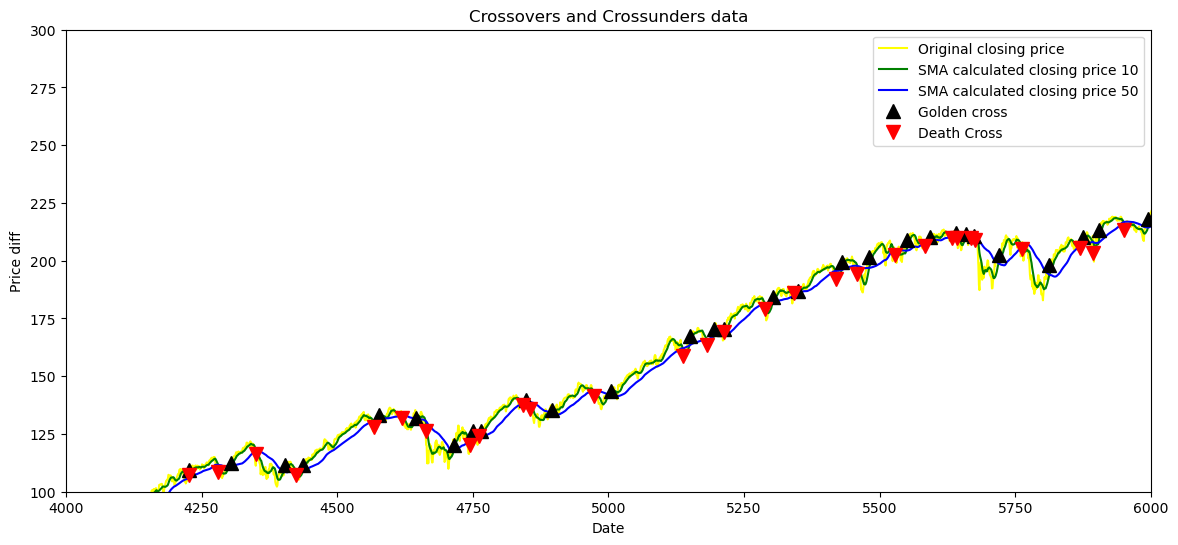

In [11]:
# Visualization crossover: We will be visualizing the crossovers which have happened
# As they are the important points to visualize the market trend


crossovers = np.where((stock_data['SMA_10'] > stock_data['SMA_50']) & (stock_data['SMA_10'].shift(1) <= stock_data['SMA_50'].shift(1)), 1, 0)
crossunders = np.where((stock_data['SMA_10'] < stock_data['SMA_50']) & (stock_data['SMA_10'].shift(1) >= stock_data['SMA_50'].shift(1)), 1, 0)

plt.figure(figsize=(14,6))

plt.plot(stock_data['Close'], label='Original closing price', color='Yellow')
plt.plot(stock_data['SMA_10'], label='SMA calculated closing price 10', color='Green')
plt.plot(stock_data['SMA_50'], label='SMA calculated closing price 50', color='Blue')

plt.plot(stock_data.index[crossovers == 1], stock_data['Close'][crossovers == 1], '^', markersize=10, color='black', label='Golden cross')
plt.plot(stock_data.index[crossunders == 1], stock_data['Close'][crossunders == 1], 'v', markersize=10, color='red', label='Death Cross')

plt.ylim(100, 300)
plt.xlim(4000, 6000)

plt.title("Crossovers and Crossunders data")
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price diff')
plt.show()

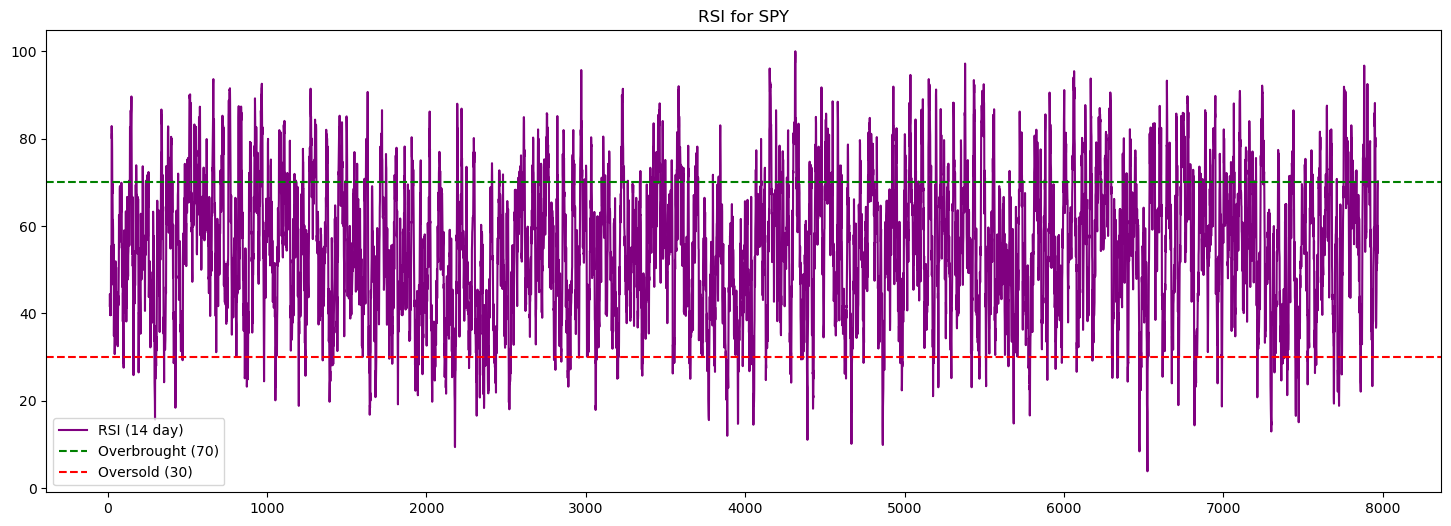

In [12]:
# 1.2 RSI : Relative Strength Index
# RSI is a momentum indicator that measures the speed and change of price movements, it helps us determine whether a stock is overbought or oversold
#  RSI above 70 stock is considered overbrought, RSI below 30 stock is considered oversold
# RSI = 100 - (100 / (1 + RS)) where RS(Relative strength) is Avg gain/Avg loss
# Calculation = Daily price change -> Separate gains and losses -> Calculate the avg gain and avg loss for 14 day period -> Calculate RS -> Calculate RSI

stock_data['Price Change'] = stock_data['Close'].diff()

stock_data['Gain'] = np.where(stock_data['Price Change'] > 0, stock_data['Price Change'], 0)
stock_data['Loss'] = np.where(stock_data['Price Change'] < 0, -stock_data['Price Change'], 0)

stock_data['Average Gain'] = stock_data['Gain'].rolling(window=14).mean()
stock_data['Average Loss'] = stock_data['Loss'].rolling(window=14).mean()

stock_data['RS'] = stock_data['Average Gain'] / stock_data['Average Loss']
stock_data['RSI'] = (100 - (100 / ( 1 + stock_data['RS'])))

plt.figure(figsize=(18, 6))
plt.plot(stock_data['RSI'], label='RSI (14 day)', color='purple')
plt.axhline(70, color='green', linestyle='--', label='Overbrought (70)')
plt.axhline(30, color='red', linestyle='--', label='Oversold (30)')
plt.title('RSI for SPY')
plt.legend()
plt.show()

# Whenever the RSI moves above 70, the stock is potentially considered overbought, meaning it may be overvalued and due for a correction or pullback
# Whenever the RSI moves below 30, the stock is potentially considered oversold, meaning it may be undervalued and due for a price bounce


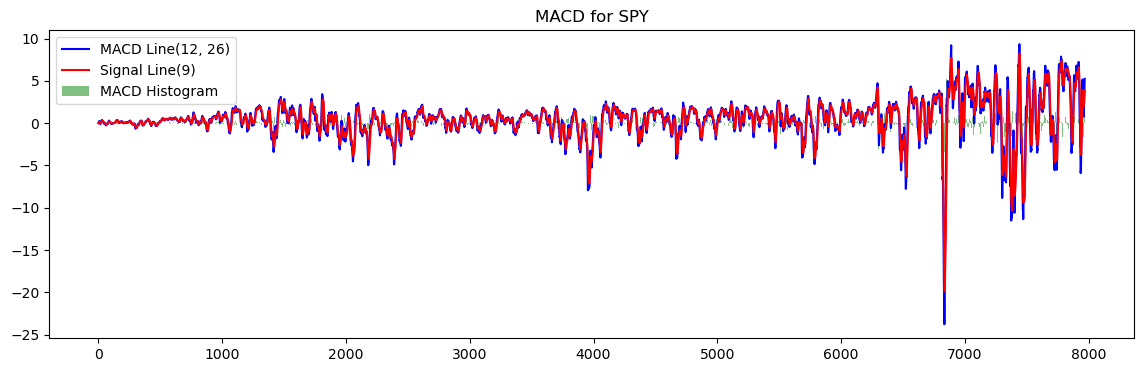

In [13]:
#  1.3 MACD : Moving average convergence divergence
# MACD is a trend following momentum indicator that shows the relaionship between two moving averages of a stock price. It helps in identifying changes in the strength, direction, momentum and duration of trend

# This is the difference between two Exponential Moving Averages (EMAs)
# MACD Line = EMA_12 - EMA_26
# EMA12: The 12-day Exponential Moving Average (short-term)
# EMA26: The 26-day Exponential Moving Average (long-term)

# A 9-day EMA of the MACD line. It helps generate buy/sell signals when it crosses the MACD line
# Single line = EMA_9 of MACD line

# The difference between the MACD Line and the Signal Line. It shows the strength of the buy or sell signal
# MACD histogram = MACD line - Singnal line

# Buy Signal: When the MACD Line crosses above the Signal Line (bullish crossover)
# Sell Signal: When the MACD Line crosses below the Signal Line (bearish crossover)


stock_data['EMA_12'] = stock_data['Close'].ewm(span=12, adjust=False).mean()
stock_data['EMA_26'] = stock_data['Close'].ewm(span=26, adjust=False).mean()

stock_data['MACD_Line'] = stock_data['EMA_12'] - stock_data['EMA_26']

stock_data['Signal_Line'] = stock_data['MACD_Line'].ewm(span=9, adjust=False).mean()

stock_data['MACD_Histogram'] = stock_data['MACD_Line'] - stock_data['Signal_Line']

plt.figure(figsize=(14, 4))

plt.plot(stock_data['MACD_Line'], label='MACD Line(12, 26)', color='blue')
plt.plot(stock_data['Signal_Line'], label='Signal Line(9)', color='red')

plt.bar(stock_data.index, stock_data['MACD_Histogram'], label='MACD Histogram', color='green', alpha=0.5)

plt.title('MACD for SPY')
plt.legend()
plt.show()
          

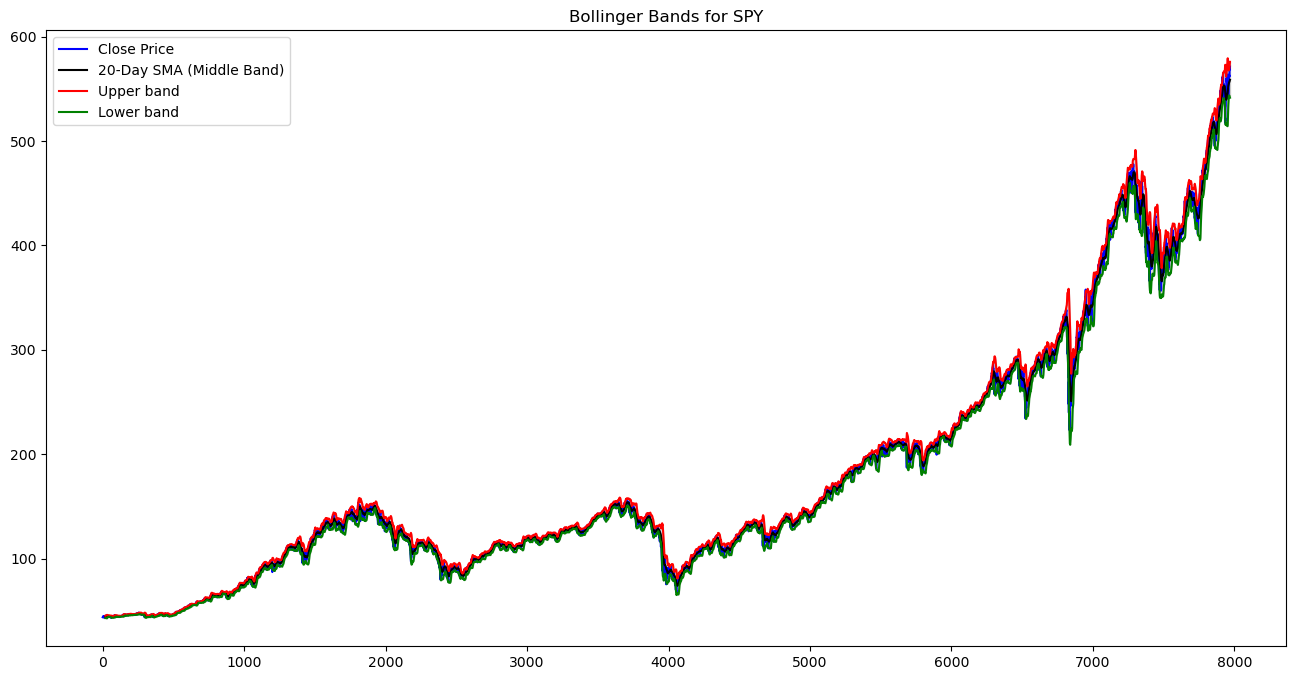

In [21]:
# 1.4 Boiling bands
# Boiling band is a volatility indicator that consists of a middle band(usually a 20 day SMA) and two outer bands
# The outer bands are typically set 2 standard deviatio above and below the middle band, they expand and contract based on market volatility

# Components: Middle Band(20 day), Upper band, Lower Band

# Upper band: When the price approaches or touches the upper band, the stock may be overbrought(possible selling point)
# Lower band: When the price approaches or touches the lower band, the stock may be oversold(possible buying point)
# Squeeze: When the bands are close together, it indicates low volatility and may precade a breakout
# Expansion: When the bands are far apart, it indicates high volatility

stock_data['Middle_Band'] = stock_data['Close'].rolling(window=20).mean()

stock_data['Std_Dev'] = stock_data['Close'].rolling(window=20).std()

stock_data['Upper_Band'] = stock_data['Middle_Band'] + (2 * stock_data['Std_Dev'])
stock_data['Lower_Band'] = stock_data['Middle_Band'] - (2 * stock_data['Std_Dev'])

plt.figure(figsize=(16, 8))

plt.plot(stock_data['Close'], label='Close Price', color='blue')
plt.plot(stock_data['Middle_Band'], label='20-Day SMA (Middle Band)', color='black')
plt.plot(stock_data['Upper_Band'], label='Upper band', color='red')
plt.plot(stock_data['Lower_Band'], label='Lower band', color='green')

plt.fill_between(stock_data.index, stock_data['Lower_Band'], stock_data['Upper_Band'], color='grey', alpha=0.3)

plt.title('Bollinger Bands for SPY')
plt.legend()
plt.show()


In [22]:
# 2. Backtesting

# Backtesting is the process of testing a trading strategy on historical data to see how it would hav performed.
# This helps determine if a strategy is profitable and it has the potential to work in the future 

In [23]:
# Basic framework

# Step 1: Define the Strategy Rules
# Define the rules for entry (buy) and exit (sell) signals based on the SMA crossover.
# Buy Signal: When the 10-day SMA crosses above the 50-day SMA
# Sell Signal: When the 10-day SMA crosses below the 50-day SMA

# Step 2: Simulate Trades
# Initialize variables for tracking the backtest state:
# - cash: Start with a fixed cash balance (e.g., $10,000).
# - position: Number of shares currently held (initially 0).
# - portfolio_value: Track daily portfolio value (cash + value of held shares).

# Loop through each day in the dataset and check if the entry or exit condition is met:
# - If buy signal (10-day SMA crosses above 50-day SMA) and no shares are held: Buy shares using available cash and Update position with the number of shares bought
# - If sell signal (10-day SMA crosses below 50-day SMA) and shares are held: Sell all held shares and Update cash balance with the proceeds from the sale
# - Keep track of each transaction to analyze later if needed

# Step 3: Calculate Portfolio Value Over Time
# After each simulated trade, calculate the daily portfolio value as:
# - Portfolio Value = Cash + (Position * Close Price)
# This gives a daily snapshot of the portfolio’s value, which will help evaluate performance

# Step 4: Evaluate Performance
# Calculate the following performance metrics to assess the strategy:

# 1. Cumulative Return: Total return over the backtest period
# 2. Maximum Drawdown: The maximum decline from a peak in portfolio value to a trough
# 3. Sharpe Ratio: Risk-adjusted return, measuring excess return for each unit of risk